This notebook reproduces results from Section V: Polygonal Faces of the paper
"Phase locking and multistability in the topological Kuramoto model on cell complexes".

It generates Figures 2–4, demonstrating phase-locked states and multistability patterns in ring cell complexes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.ticker import MultipleLocator

from core.complexes import (
    compute_boundary_matrices,
    get_C_from_B,
    get_K_from_B,
)

from core.dynamics import (
    find_all_plus_omega_zero_solutions,
    all_partitions,
)

from core.rings import (
    find_what_works_ring,
    plot_ring_fcurves_grouped_stable,
    plot_all_phase_locked_solutions_for_varying_w0_both,
    plot_bifurcation_ring_branches
)


Let us start by defining a ring with 6 nodes and 6 edges, finding relevant matrices and defining all possible partitions of the ring.

In [2]:
S0_ring = [[1], [2], [3], [4], [5], [6]]
S1_ring = [[1,2], [2,3], [3,4], [4,5], [5,6], [6,1]]
S2_ring = [[1,2,3,4,5,6]]

S_ring = [S0_ring, S1_ring, S2_ring]
boundary_matrices_ring = compute_boundary_matrices(S_ring)

B1r, B2r = boundary_matrices_ring
C1r, C2r = get_C_from_B(B1r, B2r)
K1r, K2r = get_K_from_B(B1r, B2r)

ring_partitions = all_partitions(len(S_ring[1]))

Test the solution finder for any of 64 partitions -- this one looks for all solutions, not only stable ones!

In [3]:
S_plus, S_minus = ring_partitions[0] # index here determines which partition to use

roots_ring = find_what_works_ring(
    S_plus=S_plus, S_minus=S_minus,
    B1=B1r, K1=K1r, C1=C1r,
    z_range=range(-1, 5),
    verbose=False
)

print(roots_ring)

[(array([], dtype=float64), array([2]), array([], dtype=float64), array([0.8660254])), (array([], dtype=float64), array([3]), array([], dtype=float64), array([0.])), (array([], dtype=float64), array([4]), array([], dtype=float64), array([-0.8660254]))]


We now plot Fig 2. This is a graphical solution: we plot $C_1^\top f_0 (\psi^{[-]})/(2\pi)$ and check where it intersects integer values. All 64 solutions will be grouped into 7 curves according to multiset permutations which conserve the length of the partitions.

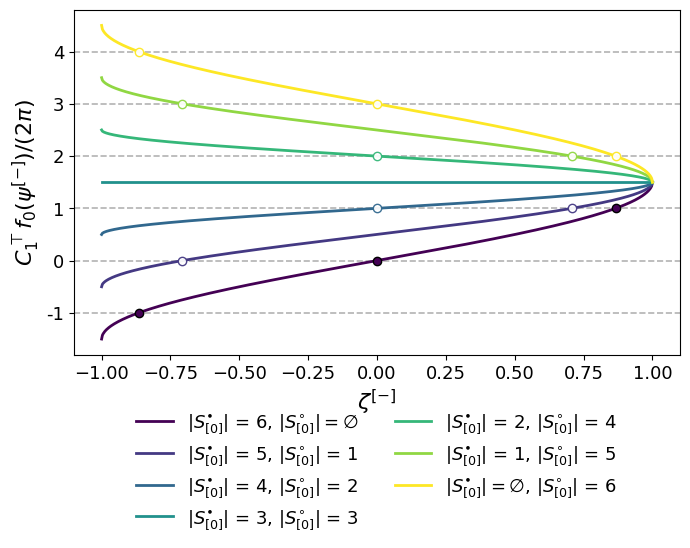

In [5]:
plot_ring_fcurves_grouped_stable(B1r, K1r, C1r, ring_partitions,
                                 omega=None, resolution=700, levels=(-1, 4), save_path="Fig2.pdf")


Let us now proceed to Fig 3a: we study the effect of inhomogeininty in intrinsic frequencies by setting $\vec \omega = (0, 0, 0, 0, +\omega_0, -\omega_0)$. We plot  $C_1^\top f_0(\psi^{[-]})/(2\pi)$ as a function of $\zeta^{[-]}$ for the all-plus partition (solid lines) and the $S_{[0]}^\circ = [5, 6]$ partition (dashed lines).
The inset shows a curious phenomenon: for a narrow interval of $\omega_0$ values, the solution arising from $S_{[0]}^\circ = [5, 6]$ crosses zero twice, with one solution becoming stable, while $S_{[0]}^\circ = \emptyset$ does not intersect zero.

c:\Users\i.bacic\Documents\TopologicalKuramoto\repo\notebooks\core\rings.py:461: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


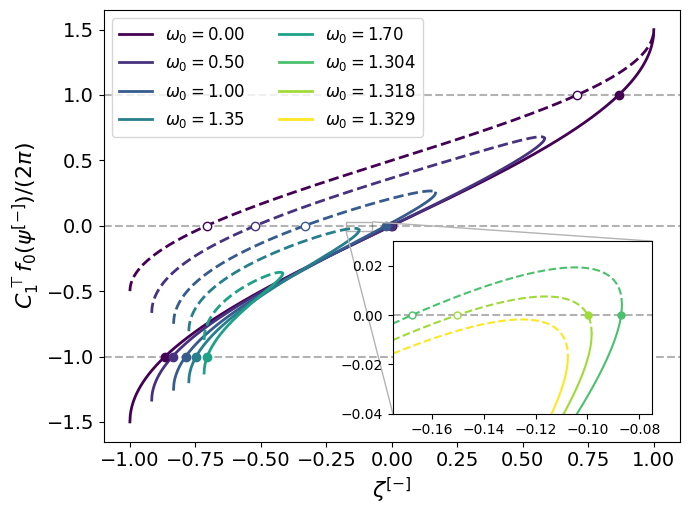

In [4]:
Sp0, Sm0 = ring_partitions[0]  # all plus partition
Sp1, Sm1 = ring_partitions[1]  # +++++- partition

w0_vals_main = [0.0, 0.5, 1.0, 1.35, 1.7]
w0_vals_inset = [1.304, 1.318, 1.329]

plot_all_phase_locked_solutions_for_varying_w0_both(
    Sp0, Sm0, Sp1, Sm1,
    B1r, K1r, C1r,
    w0_vals_main, w0_vals_inset
)


Fig 3b demonstrates that the stable solution $S_{[0]}^\circ = \emptyset$ (orange line) vanishes at around $\omega_0 \approx 1.309$, becoming the stable solution $S_{[0]}^\circ = [5, 6]$. The stable (solid blue line) and unstable solution (dashed blue line) of $S_{[0]}^\circ = [5, 6]$ vanish in a saddle-node bifurcation around $\omega_0 \approx 1.327$.

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

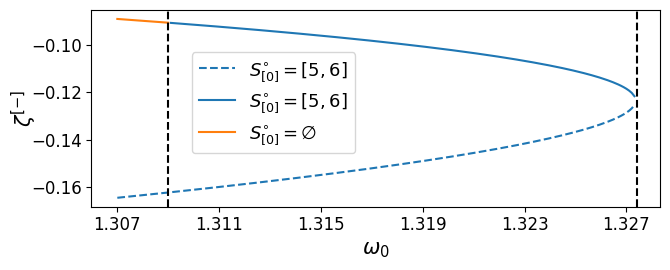

In [7]:
Sp0, Sm0 = ring_partitions[0]  # all plus
Sp1, Sm1 = ring_partitions[1]  # +++++-
plot_bifurcation_ring_branches(
    Sp0, Sm0, Sp1, Sm1,
    B1r, K1r, C1r
)


Finally, we study the number of stable solutions $N_{stable}$ depending on ring size $s$ in an all-normal partitioned ring, comparing numerical results and our theoretical prediction.

In [8]:
# Generate ring complexes
def generate_rings(n):
    """
    Construct a 1D ring (cycle) complex with n vertices.

    Returns:
        S0 : list of [vertex]
        S1 : list of [i, j] edges (cyclic)
        S2 : list containing one [1, 2, ..., n] face
    """
    S0 = [[i] for i in range(1, n + 1)]
    S1 = [[i, (i % n) + 1] for i in range(1, n + 1)]
    S2 = [list(range(1, n + 1))]
    return S0, S1, S2


# Simulation 
all_sols = []
ring_sizes = list(range(3, 33))

for ring_size in ring_sizes:
    print(f"n = {ring_size}")
    S_ring = generate_rings(ring_size)
    sols = find_all_plus_omega_zero_solutions(S_ring, 1, False, tol=1e-7)
    print(f"Total of {len(sols)} solutions.")
    all_sols.append(sols)

# Theory 
sol_num = [len(sols) for sols in all_sols]

def ring_size_function(n):
    return 1 + 2 * math.floor((n - 1) / 4)

ring_sizes_calc = [ring_size_function(n) for n in ring_sizes]

n = 3
n = 1,
C_n = [[1. 1. 1.]],
C_np1 = []
total of 1 different z_n_vecs considered, and 1 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ([], (0,))
zeta_plus = [], zeta_minus = [0.]
Solution z+ = [], z- = (0,): is stable.
Solution z+ = [], z- = (0,): all cos(theta) > 0.
Root 1: z+ = [], z- = (0,), zeta_plus = [], zeta_minus = [0.], Stable: True, Positive: True
Cos(theta)_minus: [1. 1. 1.] 
 Eig J1:[-3.00000000e+00 -3.00000000e+00  1.11022302e-16]
 Cos(theta)_plus: None
 Eig J2:None

Total of 1 solutions.
n = 4
n = 1,
C_n = [[1. 1. 1. 1.]],
C_np1 = []
total of 1 different z_n_vecs considered, and 1 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ([], (0,))
zeta_plus = [], zeta_minus = [0.]
Solution z+ = [], z- = (0,): is stable.
Solution z+ = [], z- = (0,): all cos(theta) > 0.
Root 1: z+ = [], z- = (0,), zeta_plus = [], zeta_minus = [0.], Stable: True, Positive: True
Cos(theta)_minus: [1. 1. 1. 1.] 
 Eig J1:[-4.00000000e+00 -2.00000000e+00 -2.00000

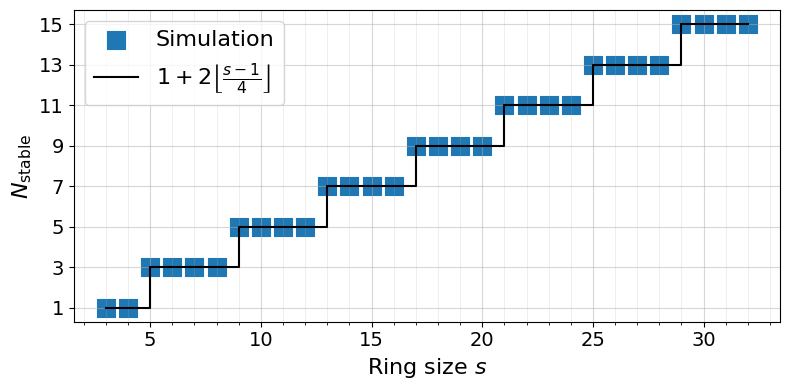

In [10]:
plt.figure(figsize=(8, 4))

plt.scatter(
    ring_sizes, sol_num,
    s=150, marker='s', linewidth=0.8, label='Simulation'
)
plt.step(
    ring_sizes, ring_sizes_calc, where='post',
    color='k', label=r'$1 + 2 \left\lfloor \frac{s - 1}{4} \right\rfloor $'
)

# Grid and ticks
plt.grid(True, alpha=0.5)
y_min, y_max = plt.ylim()
y_ticks = [y for y in range(int(y_min), int(y_max) + 1) if y % 2 == 1]
plt.yticks(y_ticks)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.grid(which='minor', linewidth=0.5, alpha=0.3)

# Labels and legend
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'Ring size $s$', fontsize=16)
plt.ylabel(r'$N_{\text{stable}}$', fontsize=16)
plt.legend(loc='upper left', fontsize=16)

plt.tight_layout()
plt.savefig('Fig4.pdf', bbox_inches='tight')
plt.show()